<a href="https://colab.research.google.com/github/huhji/NLP-Basic/blob/main/CommonLit_NLP_Guide.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Common Lit: Detailed Guide to Learn NLP

## Library Importations

In [ ]:
!pip install -U scikit-learn
!python3 -m spacy download en_core_web_lg

In [ ]:
import gc
gc.collect()

111

In [ ]:
import numpy as np
import pandas as pd
import time
import string
import re
import math
import seaborn as sns
import matplotlib.pyplot as plt

from collections import Counter

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LinearRegression, Ridge, Lasso, TweedieRegressor, HuberRegressor
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import mean_squared_error as mse

import xgboost as xgb

from bokeh.plotting import figure
from bokeh.models import ColumnDataSource
from bokeh.io import curdoc, show, output_notebook
output_notebook()

import nltk
from nltk import word_tokenize
from nltk.stem.snowball import SnowballStemmer
from nltk.corpus import stopwords
from nltk import pos_tag
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
stop_words = stopwords.words('english')

import spacy
nlp = spacy.load('en_core_web_lg')
from spacy import displacy

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, LearningRateScheduler, ReduceLROnPlateau

In [2]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

## Loading Datasets

In [ ]:
# Î°úÏª¨ ÌååÏùºÏóêÏÑú ÏóÖÎ°úÎìú
from google.colab import files
files.upload()

In [3]:
# Google DriveÏóêÏÑú ÏóÖÎ°úÎìú
from google.colab import drive 
drive.mount('/content/gdrive/')

Mounted at /content/gdrive/


In [4]:
import os
#os.getcwd()
data_path = "./gdrive/MyDrive/Kaggle_CommonLit"

In [ ]:
train_data = pd.read_csv(os.path.join(data_path,"train.csv"))
test_data = pd.read_csv(os.path.join(data_path, "test.csv"))
sample_sub = pd.read_csv(os.path.join(data_path, "sample_submission.csv"))

In [6]:
os.listdir(data_path)

['sample_submission.csv',
 'train.csv',
 'test.csv',
 'cleaned_train.csv',
 'cleaned_test.csv']

In [7]:
# load preprocessed data
import pandas as pd
train_data = pd.read_csv(os.path.join(data_path, "cleaned_train.csv"))
test_data = pd.read_csv(os.path.join(data_path, "cleaned_test.csv"))

In [8]:
print("Train dataset shape : ", train_data.shape)
print("Test dataset shape : ", test_data.shape)

Train dataset shape :  (2834, 9)
Test dataset shape :  (7, 5)


In [ ]:
train_data.head()

id url_legal  ...    target standard_error
0  c12129c31       NaN  ... -0.340259       0.464009
1  85aa80a4c       NaN  ... -0.315372       0.480805
2  b69ac6792       NaN  ... -0.580118       0.476676
3  dd1000b26       NaN  ... -1.054013       0.450007
4  37c1b32fb       NaN  ...  0.247197       0.510845

[5 rows x 6 columns]

In [ ]:
train_data["excerpt"][0]

'When the young people returned to the ballroom, it presented a decidedly changed appearance. Instead of an interior scene, it was a winter landscape.\nThe floor was covered with snow-white canvas, not laid on smoothly, but rumpled over bumps and hillocks, like a real snow field. The numerous palms and evergreens that had decorated the room, were powdered with flour and strewn with tufts of cotton, like snow. Also diamond dust had been lightly sprinkled on them, and glittering crystal icicles hung from the branches.\nAt each end of the room, on the wall, hung a beautiful bear-skin rug.\nThese rugs were for prizes, one for the girls and one for the boys. And this was the game.\nThe girls were gathered at one end of the room and the boys at the other, and one end was called the North Pole, and the other the South Pole. Each player was given a small flag which they were to plant on reaching the Pole.\nThis would have been an easy matter, but each traveller was obliged to wear snowshoes.'

In [ ]:
test_data.head()

id  ...                                            excerpt
0  c0f722661  ...  My hope lay in Jack's promise that he would ke...
1  f0953f0a5  ...  Dotty continued to go to Mrs. Gray's every nig...
2  0df072751  ...  It was a bright and cheerful scene that greete...
3  04caf4e0c  ...  Cell division is the process by which a parent...
4  0e63f8bea  ...  Debugging is the process of finding and resolv...

[5 rows x 4 columns]

## Exploratory Data Analysis 

In [ ]:
# Í≤∞Ï∏°Ïπò ÌôïÏù∏
train_data.isnull().sum()

id                   0
url_legal         2004
license           2004
excerpt              0
target               0
standard_error       0
dtype: int64

In [ ]:
test_data.isnull().sum()

id           0
url_legal    4
license      4
excerpt      0
dtype: int64

In [ ]:
# Train Target Í∞ÄÏû• ÌÅ∞Í∞í 5Í∞ú ÌôïÏù∏
display(train_data.sort_values(by=["target"], ascending=False).head())

id  ... standard_error
2829  25ca8f498  ...       0.646900
981   849971671  ...       0.596349
808   8f35441e3  ...       0.624776
1014  7a1d484be  ...       0.606997
1066  016913371  ...       0.599600

[5 rows x 6 columns]

In [ ]:
# Train Target Í∞ÄÏû• ÏûëÏùÄÍ∞í 5Í∞ú ÌôïÏù∏
display(train_data.sort_values(by=["target"]).head())

id url_legal  ...    target standard_error
1705  4626100d8       NaN  ... -3.676268       0.623621
1128  493b80aa7       NaN  ... -3.668360       0.571404
1754  fe44cbd14       NaN  ... -3.642892       0.644398
1752  284eaa5ad       NaN  ... -3.639936       0.603819
1720  9e9eacb49       NaN  ... -3.636834       0.606822

[5 rows x 6 columns]

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


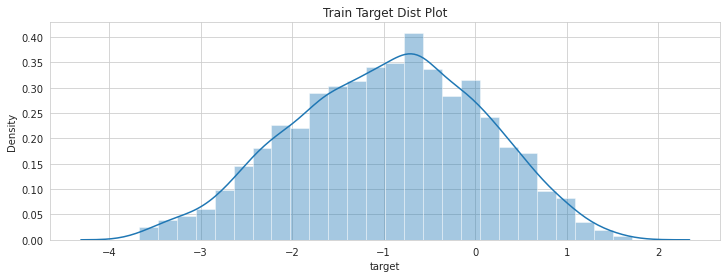

In [ ]:
# Target Î∂ÑÌè¨ ÌôïÏù∏ 

sns.set_style("whitegrid")
plt.figure(figsize=(12,4))
plt.title("Train Target Dist Plot")
sns.distplot(train_data["target"])

Text(0, 0.5, 'Missing Values Percentage')

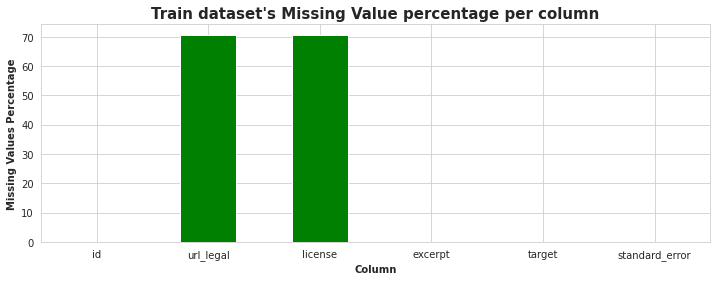

In [ ]:
# Í≤∞Ï∏°Ïπò ÌôïÏù∏

sns.set_style("whitegrid")
plt.figure(figsize=(12,4))
null_percent = train_data.isnull().mean() * 100
null_percent.plot.bar(color = "green")
plt.title("Train dataset's Missing Value percentage per column", fontsize=15, weight="bold")
plt.xlabel("Column", weight="bold")
plt.xticks(rotation=0)
plt.ylabel("Missing Values Percentage", weight="bold")

Text(0, 0.5, 'Missing Values Percentage')

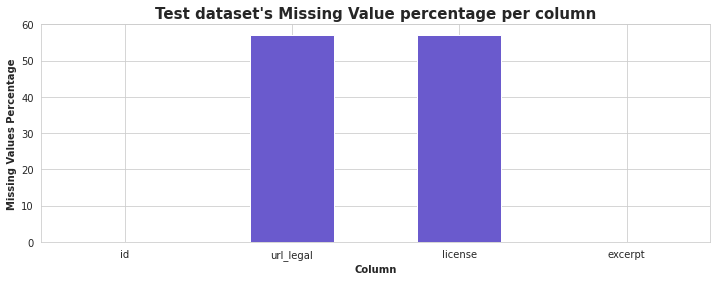

In [ ]:
sns.set_style("whitegrid")
plt.figure(figsize=(12,4))
test_null_percent = test_data.isnull().mean() * 100
test_null_percent.plot.bar(color = "slateblue")
plt.title("Test dataset's Missing Value percentage per column", fontsize=15, weight="bold")
plt.xlabel("Column", weight="bold")
plt.xticks(rotation=0)
plt.ylabel("Missing Values Percentage", weight="bold")

Text(0.5, 1.0, "Train data's exceprt word count KDE plot")

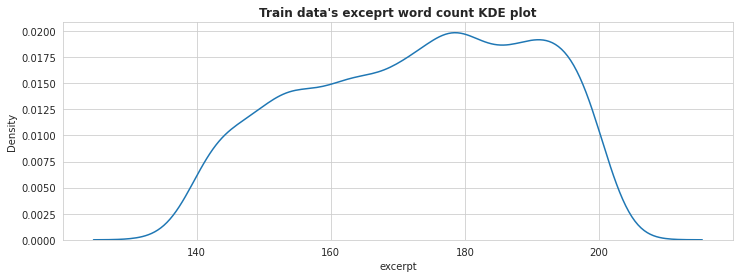

In [ ]:
# Î∞úÏ∑åÎ¨∏(excerpt) Îã®Ïñ¥ Í∞úÏàòÏôÄ Í∏∏Ïù¥ ÌôïÏù∏

plt.figure(figsize=(12, 4))
sns.kdeplot(train_data["excerpt"].str.split().str.len())
plt.title("Train data's exceprt word count KDE plot", weight="bold")

Text(0.5, 1.0, "Train data's excerpt length KDE plot")

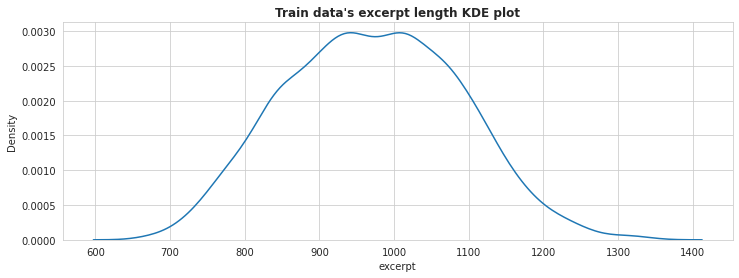

In [ ]:
plt.figure(figsize=(12,4))
sns.kdeplot(train_data["excerpt"].str.len())
plt.title("Train data's excerpt length KDE plot", weight="bold")

Text(0.5, 1.0, "Train data's License Distribution")

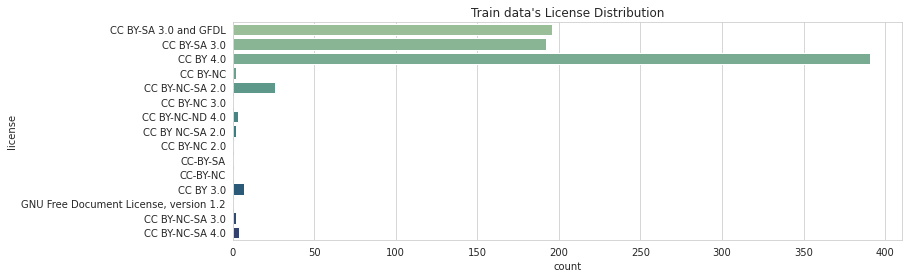

In [ ]:
# License Î∂ÑÌè¨ ÌôïÏù∏
plt.figure(figsize=(12,4))
sns.countplot(y="license", data=train_data, palette="crest")
plt.title("Train data's License Distribution")

In [ ]:
# collectionsÏùò Counter Ìï®ÏàòÎ•º ÏÇ¨Ïö©Ìïú Ï†ÑÏ≤¥ Îã®Ïñ¥ Í∞úÏàò Íµ¨ÌïòÍ∏∞

word_count = Counter()
train_data["excerpt"].str.lower().str.split().apply(word_count.update)
print("Unique Whole Word : ", len(word_count.keys()))

Unique Whole Word :  51038


In [ ]:
# Í∞ÄÏû• Í∏¥ Îã®Ïñ¥ÏôÄ Í∞ÄÏû• ÏßßÏùÄ Îã®Ïñ¥ ÌôïÏù∏
longest_word = max(word_count.keys(), key=len)
print("Longest word : ", longest_word)
print("Length of Longest word : ", len(longest_word), "\n")

shortest_word = min(word_count.keys(), key=len)
print("Shortest word : ", shortest_word)
print("Length of Shortest word : ", len(shortest_word))

Longest word :  doi:10.1016/j.iheduc.2008.03.001
Length of Longest word :  32 

Shortest word :  a
Length of Shortest word :  1


In [ ]:
sorted_word = sorted(word_count.keys(), key=len)
print("5 Longest words : ", sorted_word[-5:])
print("5 Shortest words : ", sorted_word[:5])

5 Longest words :  ['storing/retrieval/processing', 'polyhedron(pol-ee-hee-dron).', 'doi:10.1016/j.iheduc.2008.03.001', 'scream‚Äîwhew-ew-ew-ew-bang!‚Äîbroke', 'hundred‚Äîgoing‚Äîgoing‚Äîgoing‚Äîgone!"']
5 Shortest words :  ['a', 'i', '‚Äî', 'o', '5']


In [ ]:
# Target Ï†êÏàòÍ∞Ä Í∞ÄÏû• ÎÇÆÏùÄ excerpt ÌôïÏù∏ (readibility scoreÍ∞Ä ÎÇÆÏùÑÏàòÎ°ù ÏùΩÍ∏∞ Ïñ¥Î†§Ïö¥ Î¨∏Ïû•)
train_data.head()
hardest_excerpt = train_data.loc[train_data["target"] == train_data["target"].min()].excerpt
list(hardest_excerpt)

['The commutator is peculiar, consisting of only three segments of a copper ring, while in the simplest of other continuous current generators several times that number exist, and frequently 120! segments are to be found. These three segments are made so as to be removable in a moment for cleaning or replacement. They are mounted upon a metal support, and are surrounded on all sides by a free air space, and cannot, therefore, lose their insulated condition. This feature of air insulation is peculiar to this system, and is very important as a factor in the durability of the commutator. Besides this, the commutator is sustained by supports carried in flanges upon the shaft, which flanges, as an additional safeguard, are coated all over with hard rubber, one of the finest known insulators. It may be stated, without fear of contradiction, that no other commutator made is so thoroughly insulated and protected. The three commutator segments virtually constitute a single copper ring, mounted 

In [ ]:
# Target Ï†êÏàòÍ∞Ä Í∞ÄÏû• ÎÜíÏùÄ excerpt ÌôïÏù∏ (Í∞ÄÏû• ÏùΩÍ∏∞ Ïâ¨Ïö¥ Î¨∏Ïû•)
easiest_excerpt = train_data.loc[train_data["target"] == train_data["target"].max()].excerpt
list(easiest_excerpt)

['When you think of dinosaurs and where they lived, what do you picture? Do you see hot, steamy swamps, thick jungles, or sunny plains? Dinosaurs lived in those places, yes. But did you know that some dinosaurs lived in the cold and the darkness near the North and South Poles?\nThis surprised scientists, too. Paleontologists used to believe that dinosaurs lived only in the warmest parts of the world. They thought that dinosaurs could only have lived in places where turtles, crocodiles, and snakes live today. Later, these dinosaur scientists began finding bones in surprising places.\nOne of those surprising fossil beds is a place called Dinosaur Cove, Australia. One hundred million years ago, Australia was connected to Antarctica. Both continents were located near the South Pole. Today, paleontologists dig dinosaur fossils out of the ground. They think about what those ancient bones must mean.']

## Data Preprocessing

### Data Cleaning

In [ ]:
# stop word Ï†úÍ±∞
def removeStopwords(text):
    document = nlp(text)
    clean_text = ' '
    for txt in document:
        if (txt.is_stop == False):
            clean_text += " " + str(txt)        
    return clean_text

print("\033[1mText before removeStopwords function: \033[0m" + train_data['excerpt'][1] + "\n")
print("\033[1mText after removeStopwords function: \033[0m" + removeStopwords(train_data['excerpt'][1]))

Text before removeStopwords function: All through dinner time, Mrs. Fayre was somewhat silent, her eyes resting on Dolly with a wistful, uncertain expression. She wanted to give the child the pleasure she craved, but she had hard work to bring herself to the point of overcoming her own objections.
At last, however, when the meal was nearly over, she smiled at her little daughter, and said, "All right, Dolly, you may go."
"Oh, mother!" Dolly cried, overwhelmed with sudden delight. "Really?
Oh, I am so glad! Are you sure you're willing?"
"I've persuaded myself to be willing, against my will," returned Mrs. Fayre, whimsically. "I confess I just hate to have you go, but I can't bear to deprive you of the pleasure trip. And, as you say, it would also keep Dotty at home, and so, altogether, I think I shall have to give in."
"Oh, you angel mother! You blessed lady! How good you are!" And Dolly flew around the table and gave her mother a hug that nearly suffocated her.

Text after removeStopwo

In [ ]:
# Î¨∏Ïû•Í∏∞Ìò∏ Ï†úÍ±∞(. , ! ? " ')
def removePunctuations(text):
    return text.translate(str.maketrans('', '', string.punctuation))

print("\033[1mText before removePunctuations function: \033[0m" + train_data['excerpt'][1] + "\n")
print("\033[1mText after removePunctuations function: \033[0m" + removePunctuations(train_data['excerpt'][1]))

Text before removePunctuations function: All through dinner time, Mrs. Fayre was somewhat silent, her eyes resting on Dolly with a wistful, uncertain expression. She wanted to give the child the pleasure she craved, but she had hard work to bring herself to the point of overcoming her own objections.
At last, however, when the meal was nearly over, she smiled at her little daughter, and said, "All right, Dolly, you may go."
"Oh, mother!" Dolly cried, overwhelmed with sudden delight. "Really?
Oh, I am so glad! Are you sure you're willing?"
"I've persuaded myself to be willing, against my will," returned Mrs. Fayre, whimsically. "I confess I just hate to have you go, but I can't bear to deprive you of the pleasure trip. And, as you say, it would also keep Dotty at home, and so, altogether, I think I shall have to give in."
"Oh, you angel mother! You blessed lady! How good you are!" And Dolly flew around the table and gave her mother a hug that nearly suffocated her.

Text after removePun

thinking...

* Î¨∏Ïû•Í∏∞Ìò∏ÏôÄ readibility scoreÏôÄÏùò Í¥ÄÍ≥Ñ? Î¨∏Ïû•Í∏∞Ìò∏Í∞Ä Îçî ÎßéÏúºÎ©¥ ÏÉÅÎåÄÏ†ÅÏúºÎ°ú ÏùΩÍ∏∞ Ïâ¨Ïö¥ Î¨∏Ïû•Ïù¥ÏßÄ ÏïäÏùÑÍπå?
* Î¨∏Ïû• Í∏∏Ïù¥/Î¨∏Ïûê Í∏∏Ïù¥ÏôÄ scoreÏùò Í¥ÄÍ≥Ñ? Î¨∏Ïû• Í∏∏Ïù¥Í∞Ä Í∏∏ÏàòÎ°ù ÏùΩÍ∏∞ ÌûòÎìúÎãàÍπå, Í∏¥ Í∏ÄÏûêÎèÑ ÎßàÏ∞¨Í∞ÄÏßÄ (ÏïàÎÖï! vs ÏïàÎÖïÌïòÏÖ®ÏäµÎãàÍπå)
* 

In [ ]:
# ÎßÅÌÅ¨ Ï£ºÏÜå Ï†úÍ±∞
def removeLinks(text):
    clean_text = re.sub('https?://\S+|www\.\S+', '', text)
    return clean_text

test_string = "http://www.youtube.com/ and https://www.youtube.com/ should be removed "
(test_string,removeLinks(test_string))

('http://www.youtube.com/ and https://www.youtube.com/ should be removed ',
 ' and  should be removed ')

In [ ]:
# Ïà´Ïûê Ï†úÍ±∞
def removeNumbers(text):
    clean_text = re.sub(r'\d+', '', text)
    return clean_text

test_string = "Hi üôà 99 girls are running"
(test_string,removeNumbers(test_string))

('Hi üôà 99 girls are running', 'Hi üôà  girls are running')

In [ ]:
# Ìï®Ïàò ÌïòÎÇòÎ°ú ÌÜµÌï©
def clean(text):
    text = text.lower() #Lets make it lowercase
    text = removeStopwords(text)
    text = removePunctuations(text)
    text = removeNumbers(text)
    text = removeLinks(text)
    return text

In [ ]:
# train Îç∞Ïù¥ÌÑ∞Ïóê Ï†ïÎ≥¥ Ï∂îÍ∞Ä

train_data['excerpt_len'] = train_data['excerpt'].apply(
    lambda x : len(x)
)
train_data['excerpt_word_count'] = train_data['excerpt'].apply(
    lambda x : len(x.split(' '))
)
train_data['excerpt_clean'] = train_data['excerpt'].apply(clean)
train_data.head()

id  ...                                      excerpt_clean
0  c12129c31  ...    young people returned ballroom  presented de...
1  85aa80a4c  ...    dinner time  mrs  fayre somewhat silent  eye...
2  b69ac6792  ...    roger predicted  snow departed quickly came ...
3  dd1000b26  ...    outside palace great garden walled round  fi...
4  37c1b32fb  ...    time bears lived house wood  little  small  ...

[5 rows x 9 columns]

In [ ]:
# test Îç∞Ïù¥ÌÑ∞ÏóêÎèÑ ÎòëÍ∞ôÏù¥ Ï†ÅÏö© 
test_data['excerpt_clean'] = test_data['excerpt'].apply(clean)
test_data.head()

id  ...                                      excerpt_clean
0  c0f722661  ...    hope lay jack promise bright light burning u...
1  f0953f0a5  ...    dotty continued mrs  gray night milk  katie ...
2  0df072751  ...    bright cheerful scene greeted eyes captain r...
3  04caf4e0c  ...    cell division process parent cell divides da...
4  0e63f8bea  ...    debugging process finding resolving defects ...

[5 rows x 5 columns]

In [ ]:
train_data.to_csv(os.path.join(data_path, "cleaned_train.csv"), index=False)
test_data.to_csv(os.path.join(data_path, "cleaned_test.csv"), index=False)

In [ ]:
# cleaning Îêú excerptÏùò Îã®Ïñ¥ Í∞úÏàò ÌôïÏù∏
results = Counter()
train_data['excerpt_clean'].str.lower().str.split().apply(results.update)
print(len(results.keys()))

26154


In [ ]:
train_data.excerpt_clean

0         young people returned ballroom  presented de...
1         dinner time  mrs  fayre somewhat silent  eye...
2         roger predicted  snow departed quickly came ...
3         outside palace great garden walled round  fi...
4         time bears lived house wood  little  small  ...
                              ...                        
2829      think dinosaurs lived  picture  hot  steamy ...
2830      solid  solids usually hard molecules packed ...
2831      second state matter discuss liquid  solids h...
2832      solids shapes actually touch  dimensions  me...
2833      animals cells  eat things digest inside  ani...
Name: excerpt_clean, Length: 2834, dtype: object

### N-gram preprocessing

In [ ]:
# sklearnÏùò CountVectorizerÎ•º ÏÇ¨Ïö©Ìï¥ Îã®Ïñ¥ ÎπàÎèÑÏàò Íµ¨ÌïòÍ∏∞ (Unigram)

vec = CountVectorizer().fit(train_data['excerpt_clean'])
bag_of_words = vec.transform(train_data['excerpt_clean'])
sum_words = bag_of_words.sum(axis=0) # sum_words: (1, 26040) matrix

In [ ]:
# train datasetÏùò Ï†ÑÏ≤¥ Îã®Ïñ¥ ÎπàÎèÑÏàò ÏÉÅÏúÑ 10Í∞ú Ï∂úÎ†•

words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
freq_sorted = sorted(words_freq, key = lambda x: x[1], reverse=True)
freq_sorted[:10]

[('little', 1137),
 ('said', 1112),
 ('time', 919),
 ('like', 837),
 ('people', 750),
 ('great', 702),
 ('water', 672),
 ('day', 662),
 ('called', 647),
 ('old', 625)]

In [ ]:
# sklearnÏùò CountVectorizerÎ•º ÏÇ¨Ïö©Ìï¥ Bi-gram ÎπàÎèÑÏàò Íµ¨ÌïòÍ∏∞ 

vec_bigram = CountVectorizer(ngram_range = (2,2)).fit(train_data['excerpt_clean']) # bigram
bag_of_bigram = vec_bigram.transform(train_data['excerpt_clean'])
sum_bigram = bag_of_bigram.sum(axis=0) # sum_bigram: (1, 192993) matrix

In [ ]:
# unigram --> bigramÏúºÎ°ú Î∞îÎÄåÎ©∞ Ngram Í∞úÏàò Î≥ÄÌôî
np.shape(sum_bigram)

(1, 192993)

In [ ]:
# bigram ÎπàÎèÑÏàò ÏÉÅÏúÑ 10Í∞ú Ï∂úÎ†• 
bigram_freq = [(word, sum_bigram[0, idx]) for word, idx in vec_bigram.vocabulary_.items()]
bigram_freq_sorted = sorted(bigram_freq, key = lambda x: x[1], reverse=True)
bigram_freq_sorted[:10]

[('united states', 100),
 ('years ago', 77),
 ('years old', 58),
 ('long time', 58),
 ('little girl', 56),
 ('th century', 55),
 ('old man', 49),
 ('new york', 46),
 ('little boy', 44),
 ('carbon dioxide', 38)]

In [ ]:
# Top NÍ∞ú Unigram, Bigram ÎπàÎèÑÏàò Íµ¨ÌïòÎäî Ìï®Ïàò
def get_top_n_words(corpus, n = None):
    """
    A function that returns the top 'n' unigrams used in the corpus
    """
    vec = CountVectorizer().fit(corpus)
    bag_of_words = vec.transform(corpus) 
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()] 
    freq_sorted = sorted(words_freq, key = lambda x: x[1], reverse = True)
    return freq_sorted[:n]

def get_top_n_bigram(corpus, n = None):
    """
    A function that returns the top 'n' bigrams used in the corpus
    """
    vec = CountVectorizer(ngram_range = (2, 2)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis = 0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    freq_sorted = sorted(words_freq, key = lambda x: x[1], reverse=True)
    return freq_sorted[:n]

In [ ]:
top_unigram = get_top_n_words(train_data['excerpt_clean'], 20)
words = [i[0] for i in top_unigram]
count = [i[1] for i in top_unigram]
source = ColumnDataSource(data = dict(Word = words, counts = count, color = ['#6baed6'] * 20))

p = figure(x_range = words, plot_height = 400, plot_width = 800, title = "Top Unigrams", tools = "hover", tooltips = "@Word: @counts")
p.vbar(x = 'Word', top = 'counts', width = 0.8, source = source, color = 'color')
curdoc().theme = 'dark_minimal'
p.xgrid.grid_line_color = None
p.y_range.start = 0
p.title.align = 'center'
p.xaxis.major_label_orientation = "vertical"
show(p)

In [ ]:
top_bigram = get_top_n_bigram(train_data['excerpt_clean'], 20)
words = [i[0] for i in top_bigram]
count = [i[1] for i in top_bigram]
source = ColumnDataSource(data = dict(Word = words, counts = count, color = ['#a1dab4'] * 20))

p1 = figure(x_range = words, plot_height = 400, plot_width = 800, title = "Top Bigrams", tools = "hover", tooltips = "@Word: @counts")
p1.vbar(x = 'Word', top = 'counts', width = 0.8, source = source, color = 'color')
# curdoc().theme = 'dark_minimal'
p1.xgrid.grid_line_color = None
p1.title.align = 'center'
p1.y_range.start = 0
p1.xaxis.major_label_orientation = "vertical"
show(p1)

### Stemming

Stemming : Ïñ¥Í∞Ñ Ï∂îÏ∂ú
* StemmingÏùÄ Ï†ïÌï¥ÏßÑ Í∑úÏπôÎßå Î≥¥Í≥† Îã®Ïñ¥Ïùò Ïñ¥ÎØ∏Î•º ÏûêÎ•¥Îäî Ïñ¥Î¶ºÏßêÏûëÏùò ÏûëÏóÖÏûÖÎãàÎã§.  
* ÏÑ¨ÏÑ∏Ìïú ÏûëÏóÖÏù¥ ÏïÑÎãå Î£∞Î≤†Ïù¥Ïä§Ïóê Í∏∞Î∞òÌïú ÏûëÏóÖÏù¥Í∏∞ ÎïåÎ¨∏Ïóê, Ïñ¥Í∞Ñ Ï∂îÏ∂ú ÌõÑÏóê ÎÇòÏò§Îäî Í≤∞Í≥º Îã®Ïñ¥Îäî ÏÇ¨Ï†ÑÏóê Ï°¥Ïû¨ÌïòÏßÄ ÏïäÎäî Îã®Ïñ¥Ïùº ÏàòÎèÑ ÏûàÏäµÎãàÎã§.
* NLTKÏùò StemmerÏóêÎäî Porter Stemmer ÏôÄ Snowball stemmerÍ∞Ä ÏûàÎäîÎç∞, Snowball stemmerÍ∞Ä PorterÎ≥¥Îã§ ÏÇ¥Ïßù ÎÜíÏùÄ Î≤ÑÏ†ÑÏù¥Í≥†, Î≥¥Îã§ ÎßéÏù¥ ÏÇ¨Ïö©ÎêòÎäî StemmerÏù¥Í∏∞ ÎïåÎ¨∏Ïóê Ïù¥Î≤à Ï†ÑÏ≤òÎ¶¨ ÏûëÏóÖÏóêÏÑúÎäî SnowballÏùÑ ÏÇ¨Ïö©ÌñàÏäµÎãàÎã§.
* StemmingÍ≥º LemmatizationÏùÄ Îëò Îã§ Î≥ÄÌòïÎêú Îã®Ïñ¥Î•º ÏõêÎûò ÌòïÌÉúÎ°ú Î∞îÍøîÏ§çÎãàÎã§. Ï∞®Ïù¥Ï†êÏùÄ, StemmingÏùÄ ÏÜçÎèÑÍ∞Ä Îπ†Î•¥ÎÇò Í∞ÑÌòπ Ï°¥Ïû¨ÌïòÏßÄ ÏïäÎäî Îã®Ïñ¥Í∞Ä ÎÇòÏò¨ Ïàò ÏûàÍ≥†, LemmatizationÏùÄ Ïã§Ï†ú Îã®Ïñ¥ ÏõêÌòïÏùÑ Í∞ÄÏ†∏Ïò®Îã§Îäî Ï†êÏûÖÎãàÎã§.



In [ ]:
stemmer = SnowballStemmer(language='english')

tokens = train_data['excerpt'][1].split()
clean_text = ' '

for token in tokens[:20]:
    print(token + ' --> ' + stemmer.stem(token))

All --> all
through --> through
dinner --> dinner
time, --> time,
Mrs. --> mrs.
Fayre --> fayr
was --> was
somewhat --> somewhat
silent, --> silent,
her --> her
eyes --> eye
resting --> rest
on --> on
Dolly --> dolli
with --> with
a --> a
wistful, --> wistful,
uncertain --> uncertain
expression. --> expression.
She --> she


In [ ]:
def stemWord(text):
    stemmer = SnowballStemmer(language='english')
    tokens = text.split()
    clean_text = ' '
    for token in tokens:
        clean_text = clean_text + " " + stemmer.stem(token)      
    
    return clean_text

print("\033[1mText before stemWord function: \033[0m" + train_data['excerpt'][1] + "\n")
print("\033[1mText after stemWord function: \033[0m" + stemWord(train_data['excerpt'][1]))

Text before stemWord function: All through dinner time, Mrs. Fayre was somewhat silent, her eyes resting on Dolly with a wistful, uncertain expression. She wanted to give the child the pleasure she craved, but she had hard work to bring herself to the point of overcoming her own objections.
At last, however, when the meal was nearly over, she smiled at her little daughter, and said, "All right, Dolly, you may go."
"Oh, mother!" Dolly cried, overwhelmed with sudden delight. "Really?
Oh, I am so glad! Are you sure you're willing?"
"I've persuaded myself to be willing, against my will," returned Mrs. Fayre, whimsically. "I confess I just hate to have you go, but I can't bear to deprive you of the pleasure trip. And, as you say, it would also keep Dotty at home, and so, altogether, I think I shall have to give in."
"Oh, you angel mother! You blessed lady! How good you are!" And Dolly flew around the table and gave her mother a hug that nearly suffocated her.

Text after stemWord function: 

In [ ]:
train_data['excerpt_clean'] = train_data['excerpt_clean'].apply(stemWord)
test_data['excerpt_clean'] = test_data['excerpt_clean'].apply(stemWord)

In [ ]:
train_data.to_csv(os.path.join(data_path, "cleaned_train.csv"), index=False)
test_data.to_csv(os.path.join(data_path, "cleaned_test.csv"), index=False)

In [ ]:
results = Counter()
train_data['excerpt_clean'].str.lower().str.split().apply(results.update)
print(len(results.keys()))

16539


### Lemmatization

In [ ]:
# Lemmatization: ÌëúÏ†úÏñ¥ Ï∂îÏ∂ú

oc = nlp("Apple is looking at buying U.K. startup for $1 billion")
#for token in doc:
   # print(token.lemma_)
for noun in doc.noun_chunks:
    print(noun.text)

Apple
U.K. startup


In [ ]:
# origin text vs after lemma
for word in doc:
    print(word.text, word.lemma_)

Apple Apple
is be
looking look
at at
buying buy
U.K. U.K.
startup startup
for for
$ $
1 1
billion billion


In [ ]:
# ÏõêÎ≥∏ Î∞úÏ∑åÎ¨∏Í≥º ÌëúÏ†úÏñ¥ Î≥ÄÌôò ÌõÑ ÎπÑÍµê
def lemmatizeWord(text):
    tokens=nlp(text)
    clean_text = ' '
    for token in tokens:
        clean_text = clean_text + " " + token.lemma_      
    
    return clean_text

print("Text before lemmatizeWord function: " + train_data['excerpt'][1] + "\n")
print("Text after lemmatizeWord function: " + lemmatizeWord(train_data['excerpt'][1]))

doc = "Apple is looking at buying U.K. startup for $1 billion"
lemmatizeWord(doc)

Text before lemmatizeWord function: All through dinner time, Mrs. Fayre was somewhat silent, her eyes resting on Dolly with a wistful, uncertain expression. She wanted to give the child the pleasure she craved, but she had hard work to bring herself to the point of overcoming her own objections.
At last, however, when the meal was nearly over, she smiled at her little daughter, and said, "All right, Dolly, you may go."
"Oh, mother!" Dolly cried, overwhelmed with sudden delight. "Really?
Oh, I am so glad! Are you sure you're willing?"
"I've persuaded myself to be willing, against my will," returned Mrs. Fayre, whimsically. "I confess I just hate to have you go, but I can't bear to deprive you of the pleasure trip. And, as you say, it would also keep Dotty at home, and so, altogether, I think I shall have to give in."
"Oh, you angel mother! You blessed lady! How good you are!" And Dolly flew around the table and gave her mother a hug that nearly suffocated her.

Text after lemmatizeWord 

'  Apple be look at buy U.K. startup for $ 1 billion'

### Part-Of-Speech Tagging

POS ÌÉúÍ∑∏Îäî Îã®Ïñ¥Ïùò Ï†ïÏùòÏôÄ Îß•ÎùΩÏùÑ Í∏∞Î∞òÏúºÎ°ú ÎßêÎ≠âÏπòÏóê Î™ÖÏÇ¨, ÎèôÏÇ¨, ÌòïÏö©ÏÇ¨ Îì±Ïùò Î™ÖÏπ≠ÏùÑ ÌÉúÍ∑∏ÌïòÎäî Î∞©Î≤ïÏù¥Îã§.

In [ ]:
# Ï†ÑÏ≤òÎ¶¨Îêú excerpt_cleanÏóê pos_tag ÎùºÏù¥Î∏åÎü¨Î¶¨ Îß§ÌïëÌïòÍ∏∞

train_data['pos_tags'] = train_data['excerpt_clean'].str.split().map(pos_tag)

In [ ]:
train_data['pos_tags']

0       [(young, JJ), (peopl, VBP), (return, NN), (bal...
1       [(dinner, NN), (time, NN), (mrs, JJ), (fayr, N...
2       [(roger, NN), (predict, NN), (snow, VBP), (dep...
3       [(outsid, NN), (palac, NN), (great, JJ), (gard...
4       [(time, NN), (bear, JJ), (live, VBP), (hous, J...
                              ...                        
2829    [(think, VB), (dinosaur, NNS), (live, VBP), (p...
2830    [(solid, JJ), (solid, JJ), (usual, JJ), (hard,...
2831    [(second, JJ), (state, NN), (matter, NN), (dis...
2832    [(solid, JJ), (shape, NN), (actual, JJ), (touc...
2833    [(anim, NN), (cell, NN), (eat, JJ), (thing, NN...
Name: pos_tags, Length: 2834, dtype: object

In [ ]:
# ÌïôÏäµ Îç∞Ïù¥ÌÑ∞Ïóê POS ÌÉúÍπÖ Ïª¨Îüº Ï∂îÍ∞Ä
def count_tags(pos_tags):
    tag_count = {}
    for word,tag in pos_tags:
        if tag in tag_count:
            tag_count[tag] += 1
        else:
            tag_count[tag] = 1
    return tag_count

train_data['tag_counts'] = train_data['pos_tags'].map(count_tags)

In [ ]:
train_data['tag_counts']

0       {'JJ': 27, 'VBP': 3, 'NN': 46, 'RB': 1, 'VBD':...
1       {'NN': 37, 'JJ': 13, 'RB': 2, 'VBP': 5, 'NNS':...
2       {'NN': 40, 'VBP': 4, 'JJ': 16, 'VBD': 2, 'IN':...
3       {'NN': 54, 'JJ': 17, 'VBP': 3, 'IN': 3, 'RB': ...
4       {'NN': 32, 'JJ': 26, 'VBP': 5, 'NNS': 2, 'IN':...
                              ...                        
2829    {'VB': 2, 'NNS': 4, 'VBP': 6, 'NN': 36, 'JJ': ...
2830    {'JJ': 19, 'NN': 37, 'RBR': 1, 'VBP': 4, 'IN':...
2831    {'JJ': 15, 'NN': 45, 'VB': 2, 'VBD': 2, 'VBP':...
2832    {'JJ': 17, 'NN': 44, 'NNS': 2, 'VBP': 3, 'VBD'...
2833    {'NN': 46, 'JJ': 16, 'JJS': 1, 'VBD': 3, 'IN':...
Name: tag_counts, Length: 2834, dtype: object

In [ ]:
# Í∞Å ÌíàÏÇ¨ ÌÉúÍ∑∏ Ïª¨Îüº ÏÉùÏÑ±, ÎπàÎèÑÏàò Ï∂îÍ∞Ä

set_pos = set([tag for tags in train_data['tag_counts'] for tag in tags])
tag_cols = list(set_pos)

for tag in tag_cols:
    train_data[tag] = train_data['tag_counts'].map(lambda x: x.get(tag, 0))

In [ ]:
# taggingÎêú Îç∞Ïù¥ÌÑ∞ ÌôïÏù∏
train_data.loc[0]

id                                                            c12129c31
url_legal                                                           NaN
license                                                             NaN
excerpt               When the young people returned to the ballroom...
target                                                        -0.340259
standard_error                                                 0.464009
excerpt_len                                                         992
excerpt_word_count                                                  174
excerpt_clean           young peopl return ballroom present decid ch...
pos_tags              [(young, JJ), (peopl, VBP), (return, NN), (bal...
tag_counts            {'JJ': 27, 'VBP': 3, 'NN': 46, 'RB': 1, 'VBD':...
JJ                                                                   27
PDT                                                                   0
JJS                                                             

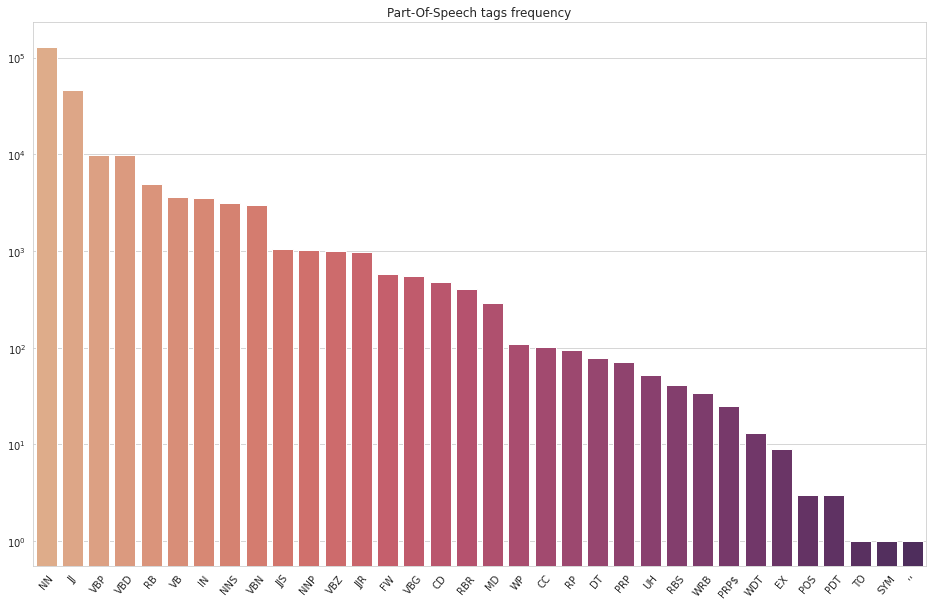

In [ ]:
# POS ÎπàÎèÑ Í∑∏ÎûòÌîÑ
pos = train_data[tag_cols].sum().sort_values(ascending = False)
sns.set_style("whitegrid")
plt.figure(figsize=(16,10))
ax = sns.barplot(x=pos.index, y=pos.values,palette="flare")
plt.xticks(rotation = 50)
ax.set_yscale('log')
plt.title('Part-Of-Speech tags frequency')
plt.show()

In [ ]:
train_data.loc[train_data['target'] == train_data['target'].max()].excerpt.to_string()

'2829    When you think of dinosaurs and where they liv...'

In [ ]:
# target Ï†êÏàòÍ∞Ä Í∞ÄÏû• ÎÜíÏùÄ(Í∞ÄÏû• ÏùΩÍ∏∞ Ïâ¨Ïö¥) Î∞úÏ∑åÎ¨∏ÏúºÎ°ú ÌíàÏÇ¨ ÌÉúÍπÖ ÌôïÏù∏ÌïòÍ∏∞
sent = str()
for word in train_data.loc[train_data['target'] == train_data['target'].max()].excerpt:
    sent += word

In [ ]:
sent

'When you think of dinosaurs and where they lived, what do you picture? Do you see hot, steamy swamps, thick jungles, or sunny plains? Dinosaurs lived in those places, yes. But did you know that some dinosaurs lived in the cold and the darkness near the North and South Poles?\nThis surprised scientists, too. Paleontologists used to believe that dinosaurs lived only in the warmest parts of the world. They thought that dinosaurs could only have lived in places where turtles, crocodiles, and snakes live today. Later, these dinosaur scientists began finding bones in surprising places.\nOne of those surprising fossil beds is a place called Dinosaur Cove, Australia. One hundred million years ago, Australia was connected to Antarctica. Both continents were located near the South Pole. Today, paleontologists dig dinosaur fossils out of the ground. They think about what those ancient bones must mean.'

In [ ]:
doc1 = nlp(sent)

In [ ]:
# Îã®Ïñ¥Îì§Í∞ÑÏùò Í¥ÄÍ≥ÑÏôÄ ÌíàÏÇ¨ ÏãúÍ∞ÅÌôî
displacy.render(doc1, style="dep", jupyter="True")

### Named Entity Recognition

**spaCy** Îäî ÏûêÏó∞Ïñ¥Î•º Ï≤òÎ¶¨ÌïòÎäî Îß§Ïö∞ Îπ†Î•∏ ÌÜµÍ≥Ñ Í∏∞Î∞ò ÎùºÏù¥Î∏åÎü¨Î¶¨Ïù¥Îã§.

ÌöåÏÇ¨, Ïû•ÏÜå, Ï°∞ÏßÅ, Ï†úÌíà Îì±Ïùò Í≥†Ïú†Î™ÖÏÇ¨Î•º ÏãùÎ≥ÑÌïòÏó¨ ÌÉúÍπÖÌï† Ïàò ÏûàÎã§. ÌÜµÍ≥Ñ Í∏∞Î∞ò ÌîÑÎ°úÏÑ∏Ïä§Ïù¥Í∏∞ ÎïåÎ¨∏Ïóê ÌïôÏäµÎêú Îç∞Ïù¥ÌÑ∞Ïóê Îî∞Îùº ÏãùÎ≥ÑÌïòÎäî Ï†ïÎèÑÍ∞Ä Îã¨ÎùºÏßà Ïàò ÏûàÏúºÎ©∞ ÌïÑÏöîÌïú Í≤ΩÏö∞ ÌäúÎãùÎèÑ Í∞ÄÎä•ÌïòÎã§.

spaCyÏóê ÏùòÌï¥ Î™ÖÎ™ÖÎêú Îã®Ïñ¥Îäî Î¨∏ÏÑúÏùò ents ÏÜçÏÑ±ÏúºÎ°ú ÏÇ¨Ïö©ÌïúÎã§.

In [ ]:
doc1 = nlp(train_data['excerpt'][22]);doc1

Were you ever on the coast of Maine? If so, you know how the rocky shores stretch out now and then clear into the ocean, and fret the salt waves till they are all in a foam. Old Ocean is not to be so set at defiance and have his rightful territory wrung from him, without taking his revenge after his own fashion. Far up into the land he sends his arms, and crooks and bends and makes his way amid the rocks, and finally falls asleep in some quiet harbor, where the tall pines stand by the shore to sing him a lullaby.
In just such a spot as this the town we shall call Fairport was built. Axe in one hand and Bible in the other, stern settlers here found a home. Strong hard-featured sons, and fair rosy-cheeked daughters made glad the rude cabins that were soon scattered along the shore. The axe was plied in the woods, and the needle by the fireside, and yet grim Poverty was ever shaking her fist in the very faces of the settlers, and whispering sad things of what the uncertain future might ha

In [ ]:
# doc1Ïóê ÏÜçÌïú ents(Entity) Îã®Ïñ¥ ÌôïÏù∏
doc1.ents

(Maine, Ocean, Fairport, Bible)

In [ ]:
# spacyÎ•º ÏÇ¨Ïö©ÌïòÏó¨ Í≥†Ïú†Î™ÖÏÇ¨ ÌÉúÍπÖÌïòÍ∏∞

displacy.render(doc1, style="ent", jupyter="True")
# gpe = Geopolitical Entity
# org = Organization

In [ ]:
for e in doc1.ents:
  print(e.text, e.start_char, e.end_char, e.label_)

Maine 30 35 GPE
Ocean 178 183 LOC
Fairport 570 578 ORG
Bible 610 615 WORK_OF_ART


## Bag of Words + Model

Bag of WordsÎäî Î¨∏ÏÑú ÎÇ¥ Îã®Ïñ¥Ïùò Î∞úÏÉù ÎπàÎèÑÎ•º ÌëúÌòÑÌïòÎäî Î∞©Ïãù. BoWÎ•º ÎßåÎìúÎäî Í≥ºÏ†ïÏùÄ Îã§ÏùåÍ≥º Í∞ôÎã§.
1. Î¨∏Ïû•Ïùò Í∞Å Îã®Ïñ¥Ïóê Í≥†Ïú†Ìïú Ïù∏Îç±Ïä§Î•º Î∂ÄÏó¨ÌïúÎã§.
2. Í∞Å Ïù∏Îç±Ïä§Ïùò Îã®Ïñ¥Ïóê Ìï¥Îãπ Îã®Ïñ¥Ïùò Ï∂úÌòÑ ÌöüÏàòÎ•º Í∏∞Î°ùÌïú Î≤°ÌÑ∞Î•º ÏÉùÏÑ±ÌïúÎã§.

In [ ]:
# Define Root Mean Squred Error
rmse = lambda y_true, y_pred: np.sqrt(mse(y_true, y_pred))
rmse_loss = lambda Estimator, X, y: rmse(y, Estimator.predict(X))

# Split data into Train and Test sets
x = train_data['excerpt_clean']
y = train_data['target']

print(len(x), len(y))

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42)
print(len(x_train), len(y_train))
print(len(x_test), len(y_test))

2834 2834
2125 2125
709 709


### Linear Regression

In [ ]:
# Unigram only
# CountVectorizer(...ngram_range=(min_n, max_n))
# only unigram: (1,1)
# unigram & bigram: (1,2)
# only bigram: (2,2)

# Îã®Ïñ¥Ïóê ÎåÄÌïú ÎπàÎèÑÏàòÎ•º Ïù¥Ïö©ÌïòÏó¨ Target Ï†êÏàò ÏÑ†ÌòïÌöåÍ∑Ä Í≥ÑÏÇ∞

model = make_pipeline(
    CountVectorizer(ngram_range=(1,1)), # unigram only
    LinearRegression(),
)

val_score = cross_val_score(
    model, 
    train_data['excerpt_clean'], 
    train_data['target'], 
    scoring=rmse_loss
).mean()

print(f'Train Score for CountVectorizer(1,1): {val_score}')

Train Score for CountVectorizer(1,1): 0.9262068130921135


In [ ]:
# Bi-grams only

model = make_pipeline(
    CountVectorizer(ngram_range=(2,2)), # Bigram only
    LinearRegression(),
)

val_score = cross_val_score(
    model, 
    train_data['excerpt_clean'], 
    train_data['target'], 
    scoring=rmse_loss
).mean()

print(f'Train Score for CountVectorizer(2,2): {val_score}')

Train Score for CountVectorizer(2,2): 0.9869933820566695


In [ ]:
# Unigram + Bigram

model = make_pipeline(
    CountVectorizer(ngram_range=(1,2)), # Unigram + Bigram
    LinearRegression(),
)

val_score = cross_val_score(
    model, 
    train_data['excerpt_clean'], 
    train_data['target'], 
    scoring=rmse_loss
).mean()

print(f'Train Score for CountVectorizer(1,2): {val_score}')

Train Score for CountVectorizer(1,2): 0.8056790248654074


In [ ]:
model

Pipeline(steps=[('countvectorizer', CountVectorizer(ngram_range=(1, 2))),
                ('linearregression', LinearRegression())])

In [ ]:
# Unigram + Bigram + Trigram

model = make_pipeline(
    CountVectorizer(ngram_range=(1,3)),
    LinearRegression(),
)

val_score = cross_val_score(
    model, 
    train_data['excerpt_clean'], 
    train_data['target'], 
    scoring=rmse_loss
).mean()

print(f'Train Score for CountVectorizer(1,3): {val_score}')

Train Score for CountVectorizer(1,3): 0.80029988147739


### Ridge Regression

In [ ]:
# Ridge Regression with Unigram

model = make_pipeline(
    CountVectorizer(ngram_range=(1,1)),
    Ridge(),
)

val_score = cross_val_score(
    model, 
    train_data['excerpt_clean'], 
    train_data['target'], 
    scoring=rmse_loss
).mean()

print(f'Train Score for Ridge Regression: {val_score}')

Train Score for Ridge Regression: 0.9171236575608557


In [ ]:
# Ridge Regression with Unigram + Bigram + Trigram

model = make_pipeline(
    CountVectorizer(ngram_range=(1,3)),
    Ridge(),
)

val_score = cross_val_score(
    model, 
    train_data['excerpt_clean'], 
    train_data['target'], 
    scoring=rmse_loss
).mean()

print(f'Train Score for Ridge Regression: {val_score}')

Train Score for Ridge Regression: 0.800328631450076


### Extreme Gradient Boosting

In [ ]:
# xgb with Unigram

model = make_pipeline(
    CountVectorizer(ngram_range=(1,1)),
    xgb.XGBRegressor() ,
)

val_score = cross_val_score(
    model, 
    train_data['excerpt_clean'], 
    train_data['target'], 
    scoring=rmse_loss
).mean()

print(f'Train Score for Extreme Gradient Boosting: {val_score}')

[03:45:43] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[03:45:46] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[03:45:49] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[03:45:51] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[03:45:53] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Train Score for Extreme Gradient Boosting: 0.8917063633326539


In [ ]:
# xgb with Unigram + Bigram

model = make_pipeline(
    CountVectorizer(ngram_range=(1,2)),
    xgb.XGBRegressor() ,
)

val_score = cross_val_score(
    model, 
    train_data['excerpt_clean'], 
    train_data['target'], 
    scoring=rmse_loss
).mean()

print(f'Train Score for Extreme Gradient Boosting: {val_score}')

[03:52:08] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[03:52:23] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[03:52:37] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[03:52:52] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[03:53:07] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Train Score for Extreme Gradient Boosting: 0.8924020415154391


## TF-IDF + Model

In [79]:
# TF-IDF Ï†ÅÏö©
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

vectorizer = TfidfVectorizer()
vectorizer.fit(train_data['excerpt_clean'])
tfidf_train = vectorizer.transform(train_data['excerpt_clean'])

In [80]:
# TF-IDF Ï†ÅÏö© ÌõÑ Îç∞Ïù¥ÌÑ∞ ÌòïÌÉú 
tfidf_train.shape # (Îã®Ïñ¥ Ïàò, Î∞úÏ∑åÎ¨∏ Ïàò)

(2834, 16569)

In [81]:
# Row: excerpt, Col: word
pd.DataFrame(tfidf_train.toarray())

0      1      2      3      4      ...  16564  16565  16566  16567  16568
0       0.0    0.0    0.0    0.0    0.0  ...    0.0    0.0    0.0    0.0    0.0
1       0.0    0.0    0.0    0.0    0.0  ...    0.0    0.0    0.0    0.0    0.0
2       0.0    0.0    0.0    0.0    0.0  ...    0.0    0.0    0.0    0.0    0.0
3       0.0    0.0    0.0    0.0    0.0  ...    0.0    0.0    0.0    0.0    0.0
4       0.0    0.0    0.0    0.0    0.0  ...    0.0    0.0    0.0    0.0    0.0
...     ...    ...    ...    ...    ...  ...    ...    ...    ...    ...    ...
2829    0.0    0.0    0.0    0.0    0.0  ...    0.0    0.0    0.0    0.0    0.0
2830    0.0    0.0    0.0    0.0    0.0  ...    0.0    0.0    0.0    0.0    0.0
2831    0.0    0.0    0.0    0.0    0.0  ...    0.0    0.0    0.0    0.0    0.0
2832    0.0    0.0    0.0    0.0    0.0  ...    0.0    0.0    0.0    0.0    0.0
2833    0.0    0.0    0.0    0.0    0.0  ...    0.0    0.0    0.0    0.0    0.0

[2834 rows x 16569 columns]

In [ ]:
# Linear Regression Ï†ÅÏö©
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [ ]:
torch.FloatTensor([[1], [2], [3]])

tensor([[1.],
        [2.],
        [3.]])

In [50]:
x_train = torch.FloatTensor(tfidf_train.toarray())
y_train = torch.FloatTensor(train_data['target'])

In [46]:
y_train

tensor([-0.3403, -0.3154, -0.5801,  ...,  0.2552, -0.2153,  0.3008])

In [28]:
x_train.shape

torch.Size([2834, 16569])

In [51]:
y_train = torch.reshape(y_train, (2834,1)) 
y_train.shape

torch.Size([2834, 1])

Í∏∞Î≥∏Ï†ÅÏúºÎ°ú pyTorchÎäî NCHWÌòïÌÉúÎ°ú Îç∞Ïù¥ÌÑ∞Î•º ÏûÖÎ†•Î∞õÎäîÎã§.

NVIDIA ÎòêÌïú GPU AcceleratorÏùò ÏµúÏ†Å ÏûÖÎ†•Í∞íÏúºÎ°ú NCHW ÌòïÏãùÏùÑ ÏÇ¨Ïö©ÌïúÎã§. ÏµúÏ†ÅÏùò ÏÑ±Îä•ÏùÑ ÏúÑÌï¥ÏÑúÎäî NCHW ÌòïÌÉúÎ°ú Î≥ÄÌôòÌïòÎäî Í≤ÉÏùÑ Í∂åÏû•ÌïúÎã§.

In [72]:
# Îã§Ï§ë ÌöåÍ∑Ä Î™®Îç∏ Ï†ïÏùò

class MultivariateLinearRegression(nn.Module):
  def __init__(self):
    super().__init__()
    self.linear = nn.Linear(16569,1) # Îã§Ìï≠ Í∞úÏàò 

  def forward(self, x):
    return self.linear(x)

In [73]:
torch.manual_seed(42)
model = MultivariateLinearRegression()

In [74]:
hypothesis = model(x_train)

In [75]:
print(hypothesis.shape)
print(y_train.shape)

torch.Size([2834, 1])
torch.Size([2834, 1])


In [76]:
x_train

tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])

In [77]:
y_train

tensor([[-0.3403],
        [-0.3154],
        [-0.5801],
        ...,
        [ 0.2552],
        [-0.2153],
        [ 0.3008]])

In [61]:
# RMSE loss function Ï†ïÏùò
class RMSELoss(nn.Module):
  def __init__(self):
    super().__init__()
    self.mse = nn.MSELoss()

  def forward(self, y_hat, y):
    return torch.sqrt(self.mse(y_hat, y))

In [78]:
epochs = 1000
hypothesis = model(x_train)
rmse_loss = RMSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.001)

for epoch in range(epochs+1):

  prediction = model(x_train)
  cost = rmse_loss(prediction, y_train)

  optimizer.zero_grad()
  cost.backward(retain_graph=True)
  optimizer.step()

  if epoch%100 == 0:
    print(f"Epoch: {epoch}/{epochs}  Cost: {cost.item()}")

Epoch: 0/1000  Cost: 1.415529489517212
Epoch: 100/1000  Cost: 1.3699359893798828
Epoch: 200/1000  Cost: 1.3280140161514282
Epoch: 300/1000  Cost: 1.289779543876648
Epoch: 400/1000  Cost: 1.2551976442337036
Epoch: 500/1000  Cost: 1.2241817712783813
Epoch: 600/1000  Cost: 1.1965950727462769
Epoch: 700/1000  Cost: 1.1722571849822998
Epoch: 800/1000  Cost: 1.150951862335205
Epoch: 900/1000  Cost: 1.1324365139007568
Epoch: 1000/1000  Cost: 1.1164535284042358


In [ ]:
# TF-IDF + Ïó¨Îü¨ model Ìï®Ïàò ÏûëÏÑ±

def training(model, X_train, y_train, X_test, y_test, model_name, ngram_range):
    t1 = time.time()
    
    model = make_pipeline(
        TfidfVectorizer(binary=True, ngram_range=ngram_range),
        model,
    )
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    RMSE = rmse(y_test, y_pred)
    
    t2 = time.time()
    training_time = t2-t1 
    return RMSE, training_time

In [ ]:
# Î™®Îç∏ ÏÑ†Ïñ∏ÌïòÍ∏∞
ridge = Ridge(fit_intercept = True, normalize = False)
lr = LinearRegression()
xgbr = xgb.XGBRegressor()
lasso = Lasso(alpha=0.1)
tr = TweedieRegressor()
hr = HuberRegressor(max_iter = 300)
models = [ridge,lr,xgbr,lasso,tr,hr]

modelnames = ["Ridge Regression","Linear Regression","Extreme Gradient Boosting", "Lasso Regression","Tweedie Regressor","Huber Regressor"]

In [ ]:
X = train_data["excerpt_clean"]
y = train_data['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

n_gram_dict = { "Unigram" : (1,1), "Unigrams + Bigrams": (1,2), "Bigrams alone": (2,2), "Unigrams + Bigrams + Trigrams": (1,3)}
rmse_dict = collections.defaultdict(list)
time_dict = collections.defaultdict(list)
for n_gram in n_gram_dict.keys():
    for i in range(0,len(models)):
        result = training(model=models[i], X_train=X_train, y_train=y_train, X_test=X_test,y_test=y_test, model_name=modelnames[i],ngram_range=n_gram_dict[n_gram])
        rmse_dict[n_gram] += [result[0]] 
        time_dict[n_gram] += [result[1]]

In [ ]:
# N-gram & Regression Ï°∞Ìï© ÌõàÎ†® Í≤∞Í≥º ÌÖåÏù¥Î∏î(RMSE)
pd.DataFrame.from_dict(rmse_dict, orient='index', columns=modelnames)

Ridge Regression  ...  Huber Regressor
Unigram                                0.735756  ...         0.785778
Unigrams + Bigrams                     0.757662  ...         0.762204
Bigrams alone                          0.959778  ...         0.910826
Unigrams + Bigrams + Trigrams          0.774075  ...         0.790582

[4 rows x 6 columns]

In [ ]:
# N-gram & Regression Ï°∞Ìï© ÌõàÎ†® ÏãúÍ∞Ñ ÌÖåÏù¥Î∏î
pd.DataFrame.from_dict(time_dict, orient='index', columns=modelnames)

Ridge Regression  ...  Huber Regressor
Unigram                                0.208725  ...         2.534675
Unigrams + Bigrams                     0.807815  ...        17.717422
Bigrams alone                          0.616868  ...        15.476595
Unigrams + Bigrams + Trigrams          1.408142  ...        35.308658

[4 rows x 6 columns]

## Embedding + Model

In [ ]:
!pip install transformers

In [84]:
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

from transformers import (AutoModel,AutoModelForMaskedLM, AutoTokenizer, LineByLineTextDataset,
                         DataCollatorForLanguageModeling,Trainer, TrainingArguments,)

In [85]:
train_data = pd.read_csv(os.path.join(data_path,"train.csv"))
test_data = pd.read_csv(os.path.join(data_path, "test.csv"))
sample_sub = pd.read_csv(os.path.join(data_path, "sample_submission.csv"))

In [86]:
text  = '.'.join(train_data.excerpt.tolist() + test_data.excerpt.tolist())

with open(os.path.join(data_path,'text.txt'),'w') as f:
    f.write(text)

In [ ]:
model_name = 'roberta-base'
model = AutoModelForMaskedLM.from_pretrained(model_name)
tokenizer = AutoTokenizer.from_pretrained(model_name)

In [94]:
dataset = LineByLineTextDataset(
    tokenizer=tokenizer,
    file_path=os.path.join(data_path,'text.txt'), #mention text file here
    block_size=128,
)

data_collator = DataCollatorForLanguageModeling(
    tokenizer=tokenizer, mlm=True, mlm_probability=0.15
)

training_args = TrainingArguments(
    output_dir="./clrp_roberta_base_chk", #select model path
    overwrite_output_dir=True,
    num_train_epochs=3,
    per_device_train_batch_size=16,
    eval_steps=20,
    metric_for_best_model = 'eval_loss',
    greater_is_better=False,
    load_best_model_at_end =True,
    prediction_loss_only=True,
    report_to = "none" 
)

trainer = Trainer(
    model=model,
    args=training_args,
    data_collator=data_collator,
    train_dataset=dataset)

In [95]:
trainer.train()

TrainOutput(global_step=804, training_loss=1.7318643218842311, metrics={'train_runtime': 585.8344, 'train_samples_per_second': 1.372, 'total_flos': 1228010344389360.0, 'epoch': 3.0, 'init_mem_cpu_alloc_delta': 0, 'init_mem_gpu_alloc_delta': 0, 'init_mem_cpu_peaked_delta': 0, 'init_mem_gpu_peaked_delta': 0, 'train_mem_cpu_alloc_delta': 0, 'train_mem_gpu_alloc_delta': 1004658176, 'train_mem_cpu_peaked_delta': 0, 'train_mem_gpu_peaked_delta': 3423351808})

### Simple Embedding

In [ ]:
# ReductLROnPlateauÎäî Î™®Îç∏Ïùò ÏÑ±Îä•Ïù¥ ÎçîÏù¥ÏÉÅ ÎÇòÏïÑÏßÄÏßÄ ÏïäÏùÑÎïå callbackÌïòÎäî Ìï®ÏàòÏù¥Îã§.

learning_rate_reduction = ReduceLROnPlateau(monitor='val_root_mean_squared_error', 
                                            patience=3, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.00001)

early_stopping = EarlyStopping(
    min_delta=0.001, # minimium amount of change to count as an improvement
    patience=5, # how many epochs to wait before stopping
    restore_best_weights=True,
)

In [ ]:
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

In [ ]:
def predict_complexity(model, excerpt):
  # Create the sequences
  padding_type='post'
  sample_sequences = tokenizer.texts_to_sequences(excerpt)
  excerpt_padded = pad_sequences(sample_sequences, padding=padding_type, 
                                 maxlen=max_length) 
  classes = model.predict(excerpt_padded)
  for x in range(len(excerpt_padded)):
    print(excerpt[x])
    print(classes[x])
    print('\n')

In [ ]:
text = train_data.excerpt_clean
vocab_size = 51038
embedding_dim = 64
max_length = 50
trunc_type='post'
pad_type='post'
oov_tok = "<OOV>"

In [ ]:
tokenizer = Tokenizer(num_words = vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(text)
word_index = tokenizer.word_index

In [ ]:
training_sequences = tokenizer.texts_to_sequences(text)
training_padded = pad_sequences(training_sequences,maxlen=max_length, 
                                truncating=trunc_type, padding=pad_type)

#validation_sequences = tokenizer.texts_to_sequences(text[800:])
#validation_padded = pad_sequences(validation_sequences,maxlen=max_length)

training_labels_final = np.array(train_data.target)
#validation_labels_final = np.array(df_train[800:].target)

In [ ]:
# Simple Model

model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.GlobalAveragePooling1D(),  
    tf.keras.layers.Dense(1)
])
model.compile(loss='mean_squared_error', metrics=[RootMeanSquaredError()])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 50, 64)            3266432   
_________________________________________________________________
global_average_pooling1d (Gl (None, 64)                0         
_________________________________________________________________
dense (Dense)                (None, 1)                 65        
Total params: 3,266,497
Trainable params: 3,266,497
Non-trainable params: 0
_________________________________________________________________


In [ ]:
num_epochs = 35
history = model.fit(training_padded, training_labels_final, epochs=num_epochs, 
                    validation_split=0.1,
                    #validation_data=(validation_padded, validation_labels_final),
                   callbacks=[early_stopping,learning_rate_reduction])

Epoch 1/35
80/80 [==============================] - 5s 17ms/step - loss: 1.5955 - root_mean_squared_error: 1.2631 - val_loss: 1.3860 - val_root_mean_squared_error: 1.1773
Epoch 2/35
80/80 [==============================] - 1s 12ms/step - loss: 1.0635 - root_mean_squared_error: 1.0313 - val_loss: 1.0358 - val_root_mean_squared_error: 1.0178
Epoch 3/35
80/80 [==============================] - 1s 13ms/step - loss: 0.7902 - root_mean_squared_error: 0.8889 - val_loss: 0.8517 - val_root_mean_squared_error: 0.9229
Epoch 4/35
80/80 [==============================] - 1s 13ms/step - loss: 0.6154 - root_mean_squared_error: 0.7844 - val_loss: 0.7503 - val_root_mean_squared_error: 0.8662
Epoch 5/35
80/80 [==============================] - 1s 12ms/step - loss: 0.4948 - root_mean_squared_error: 0.7034 - val_loss: 0.7057 - val_root_mean_squared_error: 0.8400
Epoch 6/35
80/80 [==============================] - 1s 12ms/step - loss: 0.4106 - root_mean_squared_error: 0.6408 - val_loss: 0.6920 - val_root_m

In [ ]:
def f(num):
    return math.sqrt(math.sqrt(num))

f(51308)

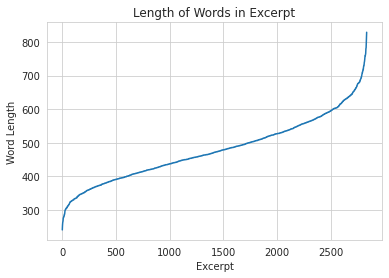

In [ ]:
xs=[]
ys=[]
current_item=1
for item in text:
 xs.append(current_item)
 current_item=current_item+1
 ys.append(len(item))
newys = sorted(ys)
plt.xlabel('Excerpt')
plt.ylabel('Word Length')
plt.title('Length of Words in Excerpt')
plt.plot(xs,newys)

plt.show()

In [ ]:
# Create model with Embedding

model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(24, activation='relu', kernel_regularizer = tf.keras.regularizers.l2(0.01)),
    tf.keras.layers.Dense(1)
])
model.compile(loss='mean_squared_error',optimizer='adam', metrics=[RootMeanSquaredError()])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 50, 64)            3266432   
_________________________________________________________________
global_average_pooling1d_1 ( (None, 64)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 24)                1560      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 25        
Total params: 3,268,017
Trainable params: 3,268,017
Non-trainable params: 0
_________________________________________________________________


In [ ]:
num_epochs = 100
history = model.fit(training_padded, training_labels_final, epochs=num_epochs, 
                    validation_split=0.1,
                    #validation_data=(validation_padded, validation_labels_final),
                   callbacks=[early_stopping,learning_rate_reduction])

Epoch 1/100
80/80 [==============================] - 3s 33ms/step - loss: 1.7929 - root_mean_squared_error: 1.2371 - val_loss: 1.3707 - val_root_mean_squared_error: 1.0813
Epoch 2/100
80/80 [==============================] - 2s 31ms/step - loss: 1.0053 - root_mean_squared_error: 0.9135 - val_loss: 0.9478 - val_root_mean_squared_error: 0.8958
Epoch 3/100
80/80 [==============================] - 3s 32ms/step - loss: 0.6483 - root_mean_squared_error: 0.7170 - val_loss: 0.8019 - val_root_mean_squared_error: 0.8215
Epoch 4/100
80/80 [==============================] - 2s 30ms/step - loss: 0.4498 - root_mean_squared_error: 0.5745 - val_loss: 0.7558 - val_root_mean_squared_error: 0.8044
Epoch 5/100
80/80 [==============================] - 2s 31ms/step - loss: 0.3266 - root_mean_squared_error: 0.4701 - val_loss: 0.7473 - val_root_mean_squared_error: 0.8033
Epoch 6/100
80/80 [==============================] - 2s 31ms/step - loss: 0.2484 - root_mean_squared_error: 0.3910 - val_loss: 0.7583 - val_

  hope lay jack promise bright light burning upper story guide course  clear night light visible village  failed account state weather  air eddying flakes  render headlight locomotive invisible yards distant  strange important fact occurred fully fourth mile village   looking vain beacon light  danger situation struck  halted  
  certain wrong   said  
  power follow direct course serve compass  village wait till morning  
[-1.2793456]


  dotty continued mrs  gray night milk  katie went  paused acorn  tree played  king queen   dotty said wished remember bring nipperkins  case milk taste great deal like nectar   nipperkins  pair handled cups children supposed silver  table  
 dotty knew wrong time played  king queen   knew milk  mrs  gray  said   ruthie need measure  pressed run  queenie drink great deal  quart left  yes  know   
 mrs  gray said milk  merely poured pan  gave pail dotty  asking time questions child stay hear 
[-0.24161443]


  bright cheerful scene greeted eyes captain 

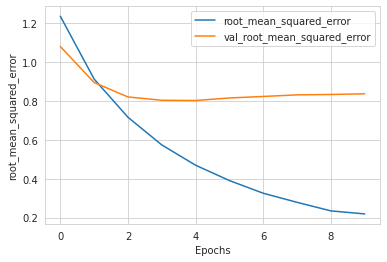

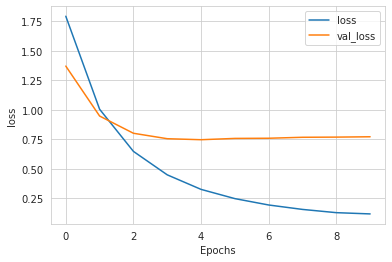

In [ ]:
predict_complexity(model, test_data['excerpt_clean'])
plot_graphs(history, "root_mean_squared_error")
plot_graphs(history, "loss")

### Convolution Neural Networks

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.Conv1D(embedding_dim, 5, activation='relu'),
    tf.keras.layers.GlobalMaxPooling1D(), 
    tf.keras.layers.Dense(24, activation='relu', kernel_regularizer = tf.keras.regularizers.l2(0.01)),
    tf.keras.layers.Dense(1)
])

# Default learning rate for the Adam optimizer is 0.001
# Let's slow down the learning rate by 10.
learning_rate = 0.0001
model.compile(loss='mean_squared_error',optimizer=tf.keras.optimizers.Adam(learning_rate), metrics=[RootMeanSquaredError()])
model.summary()


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 50, 64)            3266432   
_________________________________________________________________
conv1d (Conv1D)              (None, 46, 64)            20544     
_________________________________________________________________
global_max_pooling1d (Global (None, 64)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 24)                1560      
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 25        
Total params: 3,288,561
Trainable params: 3,288,561
Non-trainable params: 0
_________________________________________________________________


In [ ]:
num_epochs = 100
history = model.fit(training_padded, training_labels_final, epochs=num_epochs, 
                    validation_split=0.1,
                    #validation_data=(validation_padded, validation_labels_final),
                   callbacks=[early_stopping,learning_rate_reduction])

Epoch 1/100
80/80 [==============================] - 31s 35ms/step - loss: 2.2381 - root_mean_squared_error: 1.3800 - val_loss: 2.1815 - val_root_mean_squared_error: 1.3621
Epoch 2/100
80/80 [==============================] - 3s 32ms/step - loss: 1.9427 - root_mean_squared_error: 1.2741 - val_loss: 1.9162 - val_root_mean_squared_error: 1.2662
Epoch 3/100
80/80 [==============================] - 3s 32ms/step - loss: 1.6452 - root_mean_squared_error: 1.1566 - val_loss: 1.6345 - val_root_mean_squared_error: 1.1543
Epoch 4/100
80/80 [==============================] - 3s 32ms/step - loss: 1.3928 - root_mean_squared_error: 1.0469 - val_loss: 1.4925 - val_root_mean_squared_error: 1.0961
Epoch 5/100
80/80 [==============================] - 3s 32ms/step - loss: 1.2597 - root_mean_squared_error: 0.9870 - val_loss: 1.4248 - val_root_mean_squared_error: 1.0701
Epoch 6/100
80/80 [==============================] - 2s 31ms/step - loss: 1.1756 - root_mean_squared_error: 0.9496 - val_loss: 1.3795 - val

In [ ]:
model.save("commonlitmodel.h5")

### Gated Recurrent Units

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.Bidirectional(tf.keras.layers.GRU(32)),
    tf.keras.layers.Dense(1)
])

# Default learning rate for the Adam optimizer is 0.001
# Let's slow down the learning rate by 10.
learning_rate = 0.00003
model.compile(loss='mean_squared_error',optimizer=tf.keras.optimizers.Adam(learning_rate), metrics=[RootMeanSquaredError()])
model.summary()

In [ ]:
num_epochs = 35
history = model.fit(training_padded, training_labels_final, epochs=num_epochs, 
                    validation_split=0.1,
                    #validation_data=(validation_padded, validation_labels_final),
                   callbacks=[early_stopping,learning_rate_reduction])

### Simple Bi-derectional Long Short Term Memory

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(embedding_dim)), 
    tf.keras.layers.Dense(1)
])

# Default learning rate for the Adam optimizer is 0.001
# Let's slow down the learning rate by 10.
learning_rate = 0.00003
model.compile(loss='mean_squared_error',optimizer=tf.keras.optimizers.Adam(learning_rate), metrics=[RootMeanSquaredError()])
model.summary()

In [ ]:
num_epochs = 35
history = model.fit(training_padded, training_labels_final, epochs=num_epochs, 
                    validation_split=0.1,
                    #validation_data=(validation_padded, validation_labels_final),
                   callbacks=[early_stopping,learning_rate_reduction])

### Multiple Bi-derectional Long Short Term Memory

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(embedding_dim, 
                                                       return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(embedding_dim)),
    tf.keras.layers.Dense(1)
])

# Default learning rate for the Adam optimizer is 0.001
# Let's slow down the learning rate by 10.
learning_rate = 0.00003
model.compile(loss='mean_squared_error',optimizer=tf.keras.optimizers.Adam(learning_rate), metrics=[RootMeanSquaredError()])
model.summary()

In [ ]:
num_epochs = 35
history = model.fit(training_padded, training_labels_final, epochs=num_epochs, 
                    validation_split=0.1,
                    #validation_data=(validation_padded, validation_labels_final),
                   callbacks=[early_stopping,learning_rate_reduction])

## Hyper Parameters Tuning

In [ ]:
def model_builder(hp):
  model = keras.Sequential()
  model.add(tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length))

  # Tune the number of units in the first Dense layer
  # Choose an optimal value between 32-512
  hp_units = hp.Int('units', min_value=16, max_value=256, step=8)
  model.add(keras.layers.Dense(units=hp_units, activation='relu'))
  model.add(keras.layers.Dense(1))

  # Tune the learning rate for the optimizer
  # Choose an optimal value from 0.01, 0.001, or 0.0001
  hp_learning_rate = hp.Choice('learning_rate', values=[1e-3, 1e-4])

  model.compile(optimizer=keras.optimizers.Adam(learning_rate=hp_learning_rate),
                loss=keras.losses.MeanSquaredError(),
                metrics=[RootMeanSquaredError()])

  return model

### Random Search

In [ ]:
tuner_search=kt.RandomSearch(model_builder,
                       objective = kt.Objective("val_root_mean_squared_error", direction="min"),
                       max_trials=5,directory='output',project_name="nlp")


### Hyperband

In [ ]:
tuner = kt.Hyperband(model_builder,
                     max_epochs=10,
                     objective = kt.Objective("val_root_mean_squared_error", direction="min"),
                     factor=3,
                     directory='my_dir',
                     project_name='intro_to_kt')

In [ ]:
stop_early = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)

## Glove Embeddings

In [ ]:
glove_embeddings = dict()
f = open('/kaggle/input/glove6b/glove.6B.50d.txt')
for line in f:
 values = line.split()
 word = values[0]
 coefs = np.asarray(values[1:], dtype='float32')
 glove_embeddings[word] = coefs
f.close()

In [ ]:
glove_embeddings['frog']

In [ ]:
# this function creates a normalized vector for the whole sentence
def sent2vec(s):
    words = str(s).lower()
    words = word_tokenize(words)
    words = [w for w in words if not w in stop_words]
    words = [w for w in words if w.isalpha()]
    M = []
    for w in words:
        try:
            M.append(glove_embeddings[w])
        except:
            continue
    M = np.array(M)
    v = M.sum(axis=0)
    if type(v) != np.ndarray:
        return np.zeros(50)
    return v / np.sqrt((v ** 2).sum())

### Extreme Gradient Boosting

In [ ]:
xtrain, xvalid, ytrain, yvalid = train_test_split(df_train.excerpt_clean, df_train.target, 
 
                                                  random_state=42, 
                                                  test_size=0.1, shuffle=True)

In [ ]:
# create sentence vectors using the above function for training and validation set
xtrain_glove = [sent2vec(x) for x in xtrain]
xvalid_glove = [sent2vec(x) for x in xvalid]

In [ ]:
xtrain_glove = np.array(xtrain_glove)
xvalid_glove = np.array(xvalid_glove)

In [ ]:
# Fitting a simple xgboost on glove features
clf = xgb.XGBRegressor(max_depth=7, n_estimators=200, colsample_bytree=0.8, 
                        subsample=0.8, nthread=10, learning_rate=0.1, silent=False)
clf.fit(xtrain_glove, ytrain)
predictions = clf.predict(xvalid_glove)

print ("MSE: %f " % mse(yvalid, predictions))

### Stacked LSTM

In [ ]:
embedding_dim = 50
vocab_size = 51308

In [ ]:
embedding_matrix = np.zeros((vocab_size, embedding_dim))
for word, index in tokenizer.word_index.items():
 if index > vocab_size - 1:
     break
 else:
     embedding_vector = glove_embeddings.get(word)
 if embedding_vector is not None:
     embedding_matrix[index] = embedding_vector

In [ ]:
model = tf.keras.Sequential([
 tf.keras.layers.Embedding(vocab_size, embedding_dim, weights=[embedding_matrix], trainable=False),
 tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(embedding_dim,
 return_sequences=True)),
 tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(embedding_dim)),
 tf.keras.layers.Dense(24, activation='relu'),
 tf.keras.layers.Dense(1)
])

In [ ]:
learning_rate = 0.00003
model.compile(loss='mean_squared_error',optimizer=tf.keras.optimizers.Adam(learning_rate), metrics=[RootMeanSquaredError()])
model.summary()

In [ ]:
num_epochs = 100
history = model.fit(training_padded, training_labels_final, epochs=num_epochs, 
                    validation_split=0.3,
                    #validation_data=(validation_padded, validation_labels_final),
                   callbacks=[early_stopping,learning_rate_reduction])

In [ ]:
xs=[]
ys=[]
cumulative_x=[]
cumulative_y=[]
total_y=0
for word, index in tokenizer.word_index.items():
 xs.append(index)
 cumulative_x.append(index)
 if glove_embeddings.get(word) is not None:
     total_y = total_y + 1
     ys.append(1)
 else:
     ys.append(0)
 cumulative_y.append(total_y / index)

In [ ]:
fig, ax = plt.subplots(figsize=(12,2))
ax.spines['top'].set_visible(False)
plt.margins(x=0, y=None, tight=True)
#plt.axis([13000, 14000, 0, 1])
plt.fill(ys)

In [ ]:
plt.plot(cumulative_x, cumulative_y)
plt.axis([0, 25000, .915, .985])


## BERT HuggingFace Transformer

In [ ]:
tokenizer = BertTokenizer.from_pretrained('bert-large-uncased', do_lower_case=True)

In [ ]:
def bert_encode(data,maximum_length) :
  input_ids = []
  attention_masks = []
  

  for i in range(len(data.excerpt)):
      encoded = tokenizer.encode_plus(
        
        data.excerpt[i],
        add_special_tokens=True,
        max_length=maximum_length,
        pad_to_max_length=True,
        
        return_attention_mask=True,
        
      )
      
      input_ids.append(encoded['input_ids'])
      attention_masks.append(encoded['attention_mask'])
  return np.array(input_ids),np.array(attention_masks)


In [ ]:
train_input_ids,train_attention_masks = bert_encode(df_train,60)
test_input_ids,test_attention_masks = bert_encode(df_test,60)

In [ ]:
def create_model(bert_model):
  input_ids = tf.keras.Input(shape=(60,),dtype='int32')
  attention_masks = tf.keras.Input(shape=(60,),dtype='int32')
  
  output = bert_model([input_ids,attention_masks])
  output = output[1]
  #output = tf.keras.layers.Dense(32,activation='relu')(output)
  #output = tf.keras.layers.Dropout(0.2)(output)

  output = tf.keras.layers.Dense(1)(output)
  model = tf.keras.models.Model(inputs = [input_ids,attention_masks],outputs = output)
  model.compile(tf.keras.optimizers.Adam(lr=6e-6), loss='mean_squared_error', metrics=[RootMeanSquaredError()])
  return model

In [ ]:
bert_model = TFBertModel.from_pretrained('bert-large-uncased')

In [ ]:
model = create_model(bert_model)
model.summary()

In [ ]:
history = model.fit([train_input_ids,train_attention_masks],df_train.target,validation_split=0.3, epochs=2,batch_size=10)

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

## RoBerta HuggingFace Transformer

In [ ]:
tokenizer = RobertaTokenizer.from_pretrained('roberta-base')
BASE_MODEL = TFRobertaModel.from_pretrained('roberta-base')

In [ ]:
def create_model(bert_model):
  input_ids = tf.keras.Input(shape=(60,),dtype='int32')
  attention_masks = tf.keras.Input(shape=(60,),dtype='int32')
  
  output = bert_model([input_ids,attention_masks])
  output = output[1]
  output = tf.keras.layers.Dense(32,activation='relu')(output)
  output = tf.keras.layers.Dropout(0.2)(output)

  output = tf.keras.layers.Dense(1)(output)
  model = tf.keras.models.Model(inputs = [input_ids,attention_masks],outputs = output)
  
  return model



model = create_model(BASE_MODEL)
model.compile(tf.keras.optimizers.Adam(lr=6e-6), loss='mean_squared_error', metrics=[RootMeanSquaredError()])
    
model.summary()

In [ ]:
history = model.fit([train_input_ids,train_attention_masks],df_train.target,validation_split=0.3, epochs=2,batch_size=10)